In [2]:
# related third party imports
import retro
import torch
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
# local application/library specific imports
from agent import DQN, ReplayMemory, train_agent
from environment import get_screen, show_example_screen
# Auto-reload modules
%load_ext autoreload
%autoreload 2

## Setup Device and Environment - run only once

Environment loaded: StreetFighterIISpecialChampionEdition-Genesis
Device loaded: cuda


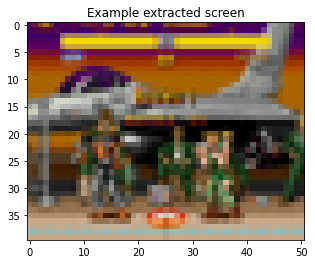

In [3]:
# setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# setup environment
rom_name = 'StreetFighterIISpecialChampionEdition-Genesis'
env = retro.make(game=rom_name).unwrapped
# setup matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
plt.ion()
# setup device (cpu/cuda)
print(f'Device loaded: {device}')
print(f'Environment loaded: {rom_name}')
show_example_screen(device, env)

## Define Training Parameters

In [4]:
# Training parameters
eps_start = 0.9
eps_end = 0.05
eps_decay = 200
n_actions = 11
batch_size = 128
gamma = 0.999
target_update = 10
num_episodes = 5

## Initialize DQN

In [5]:
# Get screen size so that we can initialize layers correctly based on shape
# returned from AI gym. Typical dimensions at this point are close to 3x40x90
# which is the result of a clamped and down-scaled render buffer in get_screen()
init_screen = get_screen(device, env)
_, _, screen_height, screen_width = init_screen.shape
policy_net = DQN(screen_height, screen_width, n_actions).to(device)
target_net = DQN(screen_height, screen_width, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()
optimizer = optim.RMSprop(policy_net.parameters())
memory = ReplayMemory(10000)

## Train agent

In [7]:
episode_durations, epsiode_rewards = train_agent(device, env, policy_net, target_net, memory,optimizer, 
                                                 n_actions, num_episodes, eps_start, eps_end,
                                                 eps_decay, batch_size, gamma, target_update, verbose=True)

print('Complete')

plt.plot(epsiode_rewards)
plt.title('Training')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

AttributeError: 'RetroEnv' object has no attribute 'em'

Text(0, 0.5, 'Total Reward')

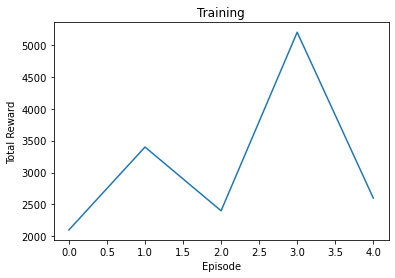

In [8]:
env.render()
env.close()
plt.ioff()
#plt.show()
plt.plot(epsiode_rewards)
plt.title('Training')
plt.xlabel('Episode')
plt.ylabel('Total Reward')